# Materials associated with the paper: 

Cao, W., Zahirovic, S., Flament, N., Williams, S., Golonka, J., and Müller, R. D., 2017: Improving global paleogeography since the late Paleozoic using paleobiology, Biogeosciences, 14, 5425-5439. https://doi.org/10.5194/bg-14-5425-2017.

### This Jupyter notebook is used to Figures 1-3 for the above paper.

The code in this notebook is written in Python 2.7. It utilizes standard scientific Python modules and the open source module 'pygplates' which provides a Python API to the open source GPlates software (https://www.gplates.org/). The software 'GMT' (The Generic Mapping Tools, http://gmt.soest.hawaii.edu/projects/gmt) also needs to be installed.

## Figure 1

### Import Python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd    
import pygplates
import os
from matplotlib import colors
from matplotlib import legend
from matplotlib.patches import Polygon
from IPython.display import Image
from resolve_topologies import resolve_topologies as topology2gmt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import IFrame
%matplotlib inline

### Read the input data

In [2]:
# read fossil data
Fossil_data=pd.read_csv('../Data/Fossil/2500Ma-collections.csv', delimiter=',')  
Fossil_data

,collection_no,collection.authorizer,license,collection.reference_no,latdec,lngdec,period,epoch,stage,ma_max,ma_min,lithology1,lithology2,environment,tectonic_setting,geology_comments
0,184,A. Miller,CC BY,13,79.130000,-76.000000,Cambrian,Early/Lower Cambrian,NaN,530.000,513.0000,"""limestone""",NaN,peritidal,NaN,"""thin bedded, glauconitic, arenaceous lst. gre..."
1,186,J. Sepkoski,CC BY,13,52.833333,-119.250000,Cambrian,NaN,NaN,541.000,485.4000,"""limestone""",NaN,"reef, buildup or bioherm",NaN,"""oolitic, sandly ls, thick bedded, carbonate b..."
2,187,J. Sepkoski,CC BY,13,52.833333,-119.250000,Cambrian,Middle Cambrian,NaN,513.000,505.0000,"""limestone""",NaN,"reef, buildup or bioherm",NaN,"""ls, partially x-bedded; some intraformational..."
3,189,J. Sepkoski,CC BY,13,42.410556,-73.525000,Cambrian,Early/Lower Cambrian,NaN,516.000,513.0000,"""limestone""","""shale""",offshore shelf,NaN,"""sh and ls; ls beds up to 15 cm thick, fine gr..."
4,193,J. Sepkoski,CC BY,13,65.000000,-111.500000,Cambrian,Early/Lower Cambrian,NaN,530.000,513.0000,"""limestone""","""shale""",slope,NaN,"""calcareous sh and silty ls. 'basin facies' -u..."
5,196,J. Sepkoski,CC BY,13,52.833333,-119.250000,Cambrian,Early/Lower Cambrian,NaN,516.000,513.0000,"""limestone""",NaN,"reef, buildup or bioherm",NaN,"""platy ls, argillaceous, some oolite, carbonat..."
6,201,J. Sepkoski,CC BY,13,39.163889,-119.833056,Cambrian,Early/Lower Cambrian,NaN,516.000,513.0000,"""limestone""",NaN,sand shoal,NaN,"""argillaceous fine grained ls, back-bank, inne..."
7,202,J. Sepkoski,CC BY,13,39.163889,-119.833056,Cambrian,Early/Lower Cambrian,NaN,516.000,513.0000,"""limestone""",NaN,"reef, buildup or bioherm",NaN,"""coarse bioclastic limestone, shoal water carb..."
8,203,J. Sepkoski,CC BY,51517,-19.629167,136.916667,Cambrian,Early/Lower Cambrian,NaN,516.000,513.0000,wackestone,NaN,"reef, buildup or bioherm",NaN,"""oolitic and xtalline ls, BA3"""
9,208,J. Sepkoski,CC BY,13,38.868889,-117.921111,Cambrian,Furongian,NaN,501.000,485.4000,conglomerate,NaN,offshore shelf,NaN,"""gravity-flow ls. congl. outer shelf, BA5"""


### Plot the data

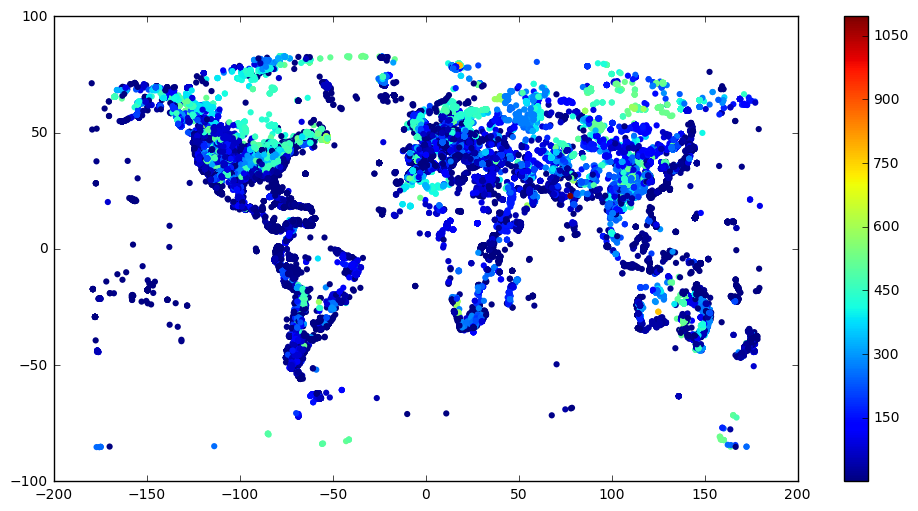

In [22]:
# calculate the average ages
av_age = (Fossil_data.ma_max+Fossil_data.ma_min)/2
#print av_age

plt.figure(figsize=(12,6))
plt.scatter(Fossil_data.lngdec,Fossil_data.latdec,c=av_age,edgecolors='')
plt.colorbar()
plt.show()


### Make the figure

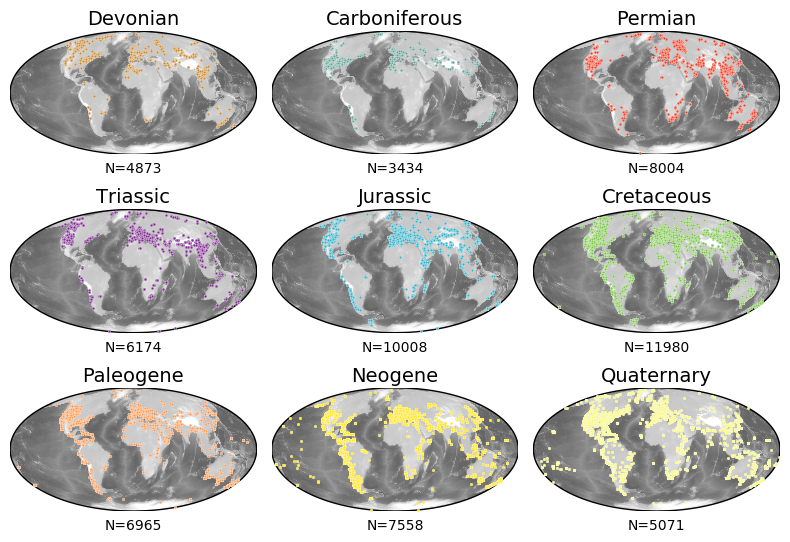

In [23]:
# plot the data on a global map
fig=plt.figure(figsize=(8,5.5),tight_layout=True)  #fig=plt.figure(figsize=(8.27, 11.69)) 

# The first plot
sub1 = fig.add_subplot(331)
#resolution: c (crude), l (low), i (intermediate), h (high), f (full) or None
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
# display a non-default image.
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
# draw lat/lon grid lines every 30 degrees.
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
df = Fossil_data.dropna(subset = ['period'])
subset1 = df[df['period'].str.contains('Devonian')]
x,y = m(np.asarray(subset1.lngdec),np.asarray(subset1.latdec))
sub1 = sub1.plot(x,y,'o',color=[203./255.,140./255.,55./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2 )
plt.title('Devonian', fontsize=14)
plt.xlabel('N=%d' % (len(subset1)+1), fontsize=10)

#second plots
sub2 = fig.add_subplot(332)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset2 = df[df['period'].str.contains('Carboniferous')]
x,y = m(np.asarray(subset2.lngdec),np.asarray(subset2.latdec))
sub2 = plt.plot(x,y,'o',color=[103./255.,165./255.,153./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Carboniferous', fontsize=14)
plt.xlabel('N=%d' % (len(subset2)+1), fontsize=10)

#Third plots
sub3 = fig.add_subplot(333)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset3 = df[df['period'].str.contains('Permian')]
x,y = m(np.asarray(subset3.lngdec),np.asarray(subset3.latdec))
sub3 = plt.plot(x,y,'o',color=[240./255.,64./255.,40./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Permian', fontsize=14)
plt.xlabel('N=%d' % (len(subset3)+1), fontsize=10)

# plots 4
sub3 = fig.add_subplot(334)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset4 = df[df['period'].str.contains('Triassic')]
x,y = m(np.asarray(subset4.lngdec),np.asarray(subset4.latdec))
sub4 = plt.plot(x,y,'o',color=[129./255.,43./255.,146./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Triassic', fontsize=14)
plt.xlabel('N=%d' % (len(subset4)+1), fontsize=10)

#plots 5
sub3 = fig.add_subplot(335)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset5 = df[df['period'].str.contains('Jurassic')]
x,y = m(np.asarray(subset5.lngdec),np.asarray(subset5.latdec))
sub5 = plt.plot(x,y,'o',color=[52./255.,178./255.,201./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Jurassic', fontsize=14)
plt.xlabel('N=%d' % (len(subset5)+1), fontsize=10)

#plot 6
sub3 = fig.add_subplot(336)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset6 = df[df['period'].str.contains('Cretaceous')]
x,y = m(np.asarray(subset6.lngdec),np.asarray(subset6.latdec))
sub6 = plt.plot(x,y,'o',color=[127./255.,198./255.,78./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Cretaceous', fontsize=14)
plt.xlabel('N=%d' % (len(subset6)+1), fontsize=10)

#plot 7
sub3 = fig.add_subplot(337)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset7 = df[df['period'].str.contains('Paleogene')]
x,y = m(np.asarray(subset7.lngdec),np.asarray(subset7.latdec))
sub7 = plt.plot(x,y,'o',color=[253./255.,154./255.,82./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Paleogene', fontsize=14)
plt.xlabel('N=%d' % (len(subset7)+1), fontsize=10)

#plot 8
sub3 = fig.add_subplot(338)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset8 = df[df['period'].str.contains('Neogene')]
x,y = m(np.asarray(subset8.lngdec),np.asarray(subset8.latdec))
sub8 = plt.plot(x,y,'o',color=[255./255.,230./255.,25./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Neogene', fontsize=14)
plt.xlabel('N=%d' % (len(subset8)+1), fontsize=10)

#plot 9
sub3 = fig.add_subplot(339)
m = Basemap(projection='moll',lat_0=0,lon_0=0, resolution='c')
m.warpimage(image='../Data/ETOPO/etopo_greyscale.jpg',alpha=0.6,scale=0.25)
df = Fossil_data.dropna(subset = ['period'])
subset9 = df[df['period'].str.contains('Quaternary')]
x,y = m(np.asarray(subset9.lngdec),np.asarray(subset9.latdec))
sub9 = plt.plot(x,y,'o',color=[249./255.,249./255.,127./255.],markeredgecolor='white',markersize=2, markeredgewidth=0.2)
#m.drawmeridians(np.arange(0,360,30),color='0.5')
#m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title('Quaternary', fontsize=14)
plt.xlabel('N=%d' % (len(subset9)+1), fontsize=10)
#plt.(0.5, 1.08, "Number= 2338",horizontalalignment='bottom',fontsize=10)

plt.savefig('Output/Fig_01.pdf')
plt.tight_layout()
plt.show()


## Figure 3a

### Read the data and make the figure

../Data/126/5_Reconstructed_Paleogeog_GolonkaIDs_126Ma/sm_fig46_135_117_reconstructed_126.00Ma.shp
No icesheet found


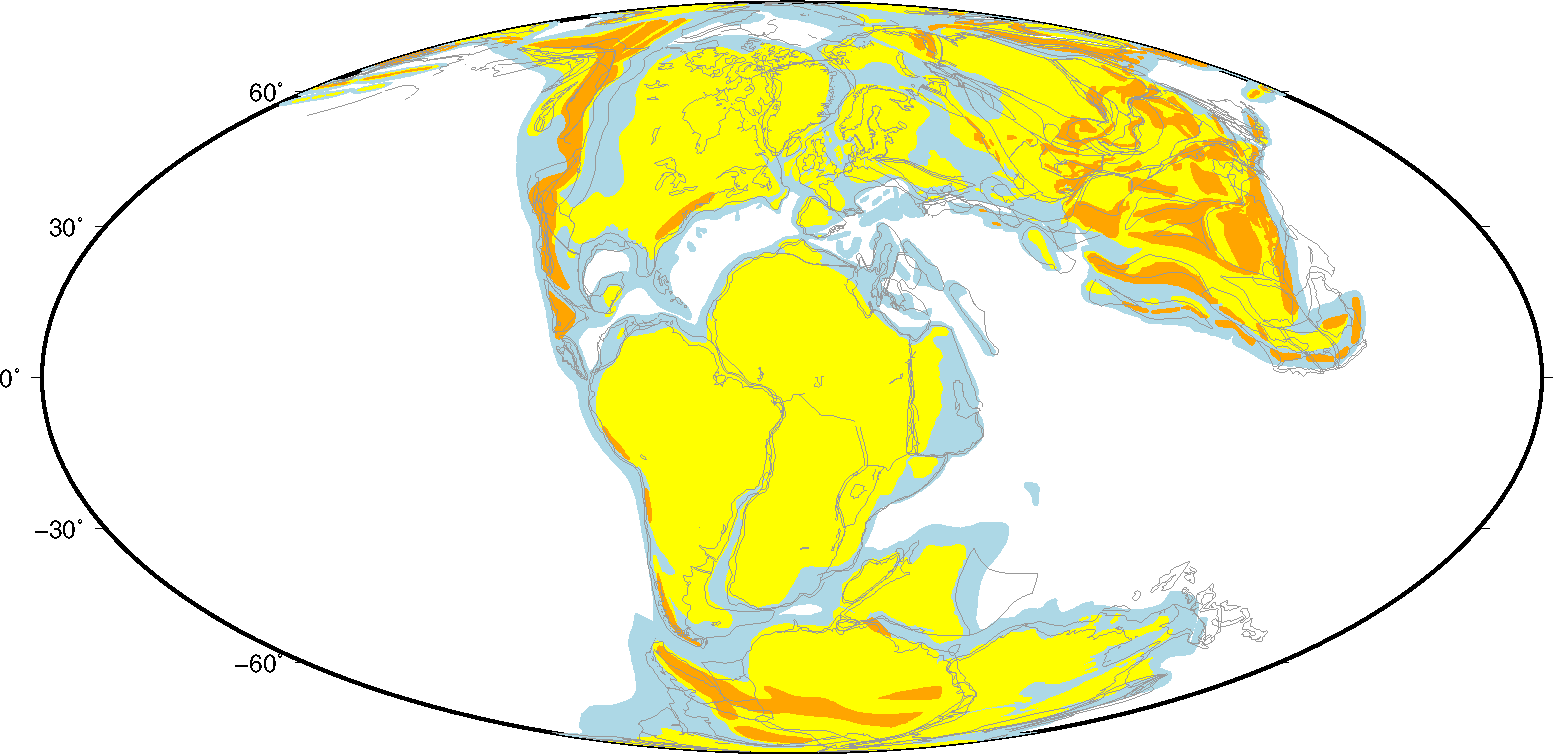

In [3]:
#Input parameters to define how reconstruction is made
reconstruction_time = 126
FromAge = 135
ToAge = 117
FigNum = 46
anchor_plate = 0

#Generate Golonka's reconstructed coastlines
input_rotation_filename = '../Data/126/Golonka_master94c1_Africa-Rel_Revised_130.5Ma.rot'
input_feature_filename = '../Data/Coastlines_Golonka/Golonka_CS.shp'

#Name the output file
output_reconstructed_feature_filename = 'Golonka_reconstructed_coastlines_%0.2fMa.shp' % reconstruction_time

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate) 

######
outfile='Output/Fig_03a.ps'

basedir = '../Data/126/5_Reconstructed_Paleogeog_GolonkaIDs_'+str(reconstruction_time)+'Ma'

#subduction = '%s/subduction_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
shallow_marine = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)

print shallow_marine

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW0/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba30f30We -K > %s ' % (proj,outfile))

#rename files (shapefile -> shapefile; shapefile ->.gmt)
tmp = pygplates.FeatureCollection(shallow_marine)
tmp.write('sm.gmt')
tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')
#tmp = pygplates.FeatureCollection(subduction)
#tmp.write('subduction.gmt')
tmp = pygplates.FeatureCollection(output_reconstructed_feature_filename)
tmp.write('coastlines.gmt')

if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
        print 'No icesheet found'  

#plot all
os.system('gmt psxy -Rg %s -W0.1p,lightblue -Glightblue sm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,yellow -Gyellow lm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,orange -Gorange m.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.1p,223/223/255 -G223/223/255 i.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.8p,black -K -O -m subduction.gmt -V >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,grey60 -O -m coastlines.gmt -V >> %s' % (proj,outfile))

os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E150 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
os.system('rm *.xml *.gmt *.conf *.xml *.shx *.shp *.history *.ps *.pyc *.shx *.prj *.dbf')
os.system('rm Output/*.ps')

#IFrame("Output/Fig_03a.pdf", width=600, height=300)
Image('Output/Fig_03a.png')


## Figure 3b

### Read the data and make the figure

No icesheet found


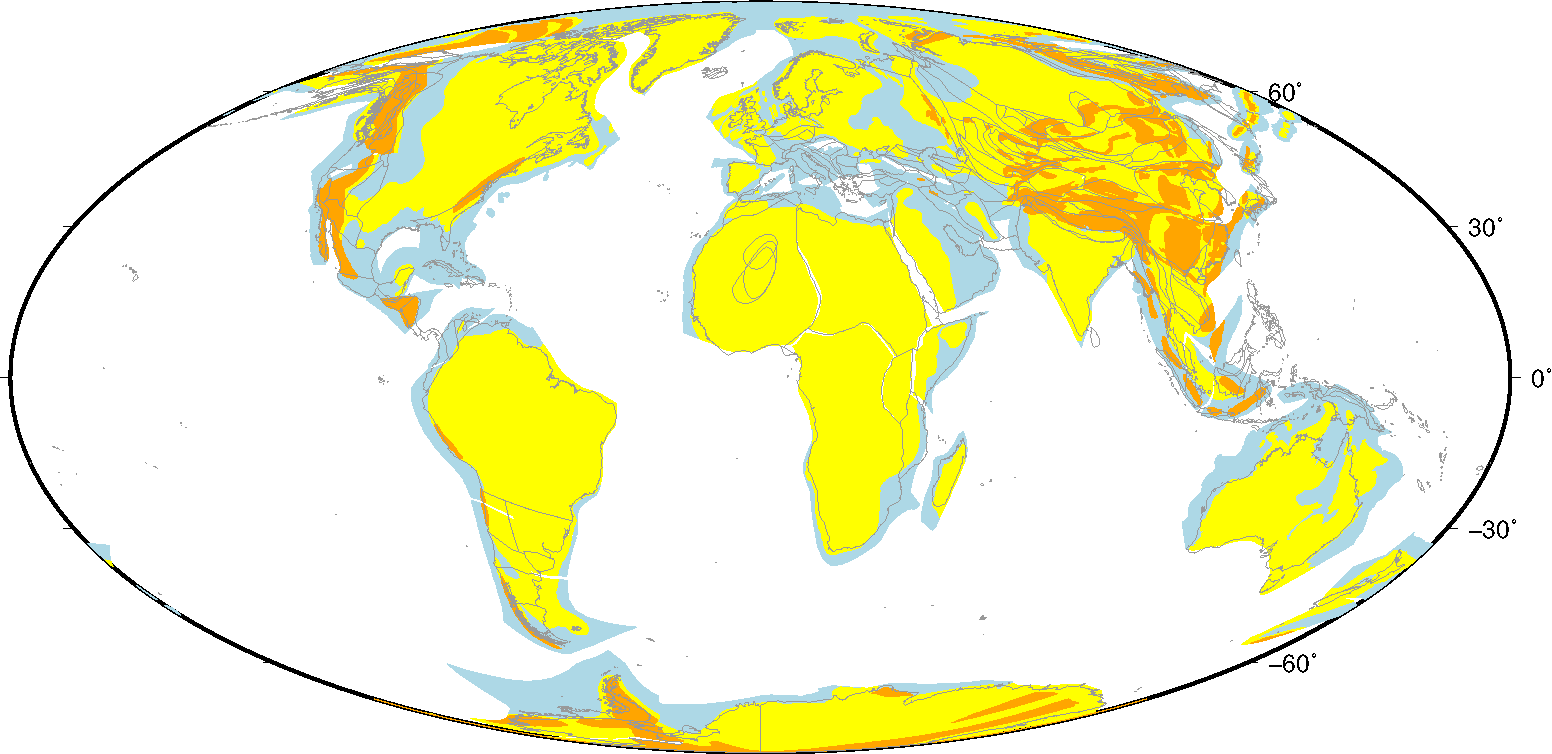

In [4]:
# read the data and models
input_feature_filename = '../Data/Matthews++_410-0Ma/Coastlines/Coastlines_low_res_Matthews++.shp'
input_rotation_filename = '../Data/New_Rotation.rot'

#Input parameters to define how the reconstruction is made
reconstruction_time = 126
FromAge = 135
ToAge = 117
FigNum = 46
anchor_plate = 0

outfile='Output/Fig_03b.ps'

basedir = '../Data/'+str(reconstruction_time)+'/4_PresentDay_Paleogeog_EBIDs_'+str(reconstruction_time)+'Ma'

icesheet =  '%s/i_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
mountain =  '%s/m_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
landmass = '%s/lm_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
shallow_marine = '%s/sm_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW0/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba30f30wE -K > %s ' % (proj,outfile))

#rename files (shapefile -> shapefile; shapefile ->.gmt)
tmp = pygplates.FeatureCollection(shallow_marine)
tmp.write('sm.gmt')
tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')

if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
        print 'No icesheet found'  

tmp = pygplates.FeatureCollection(input_feature_filename)
tmp.write('coastlines.gmt')

os.system('gmt psxy -Rg %s -W0.1p,lightblue -Glightblue sm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,yellow -Gyellow lm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,orange -Gorange m.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.1p,purple -Gpurple i.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.5p,grey -O -K -m boundary_polygons_%0.2fMa.gmt -V >> %s' % (proj,reconstruction_time,outfile))

#plot coastlines
os.system('gmt psxy -Rg %s -W0.2p,grey60 -O -m coastlines.gmt -V >> %s' % (proj,outfile))

#convert ps into raster, -E set the resolution
os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E150 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
os.system('rm *.xml *.gmt *.conf *.xml *.shx *.shp *.history *.ps *.pyc *.shx *.prj *.dbf')
os.system('rm Output/*.ps')

#IFrame("Output/Fig_03b.pdf", width=1000, height=500)
Image('Output/Fig_03b.png')


In [5]:
os.system('rm Output/*.png')

0